In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/housing.csv")

# You have to be your own teacher.

![title](https://www.wallpaperflare.com/static/803/53/244/anime-space-tea-themed-wallpaper.jpg)

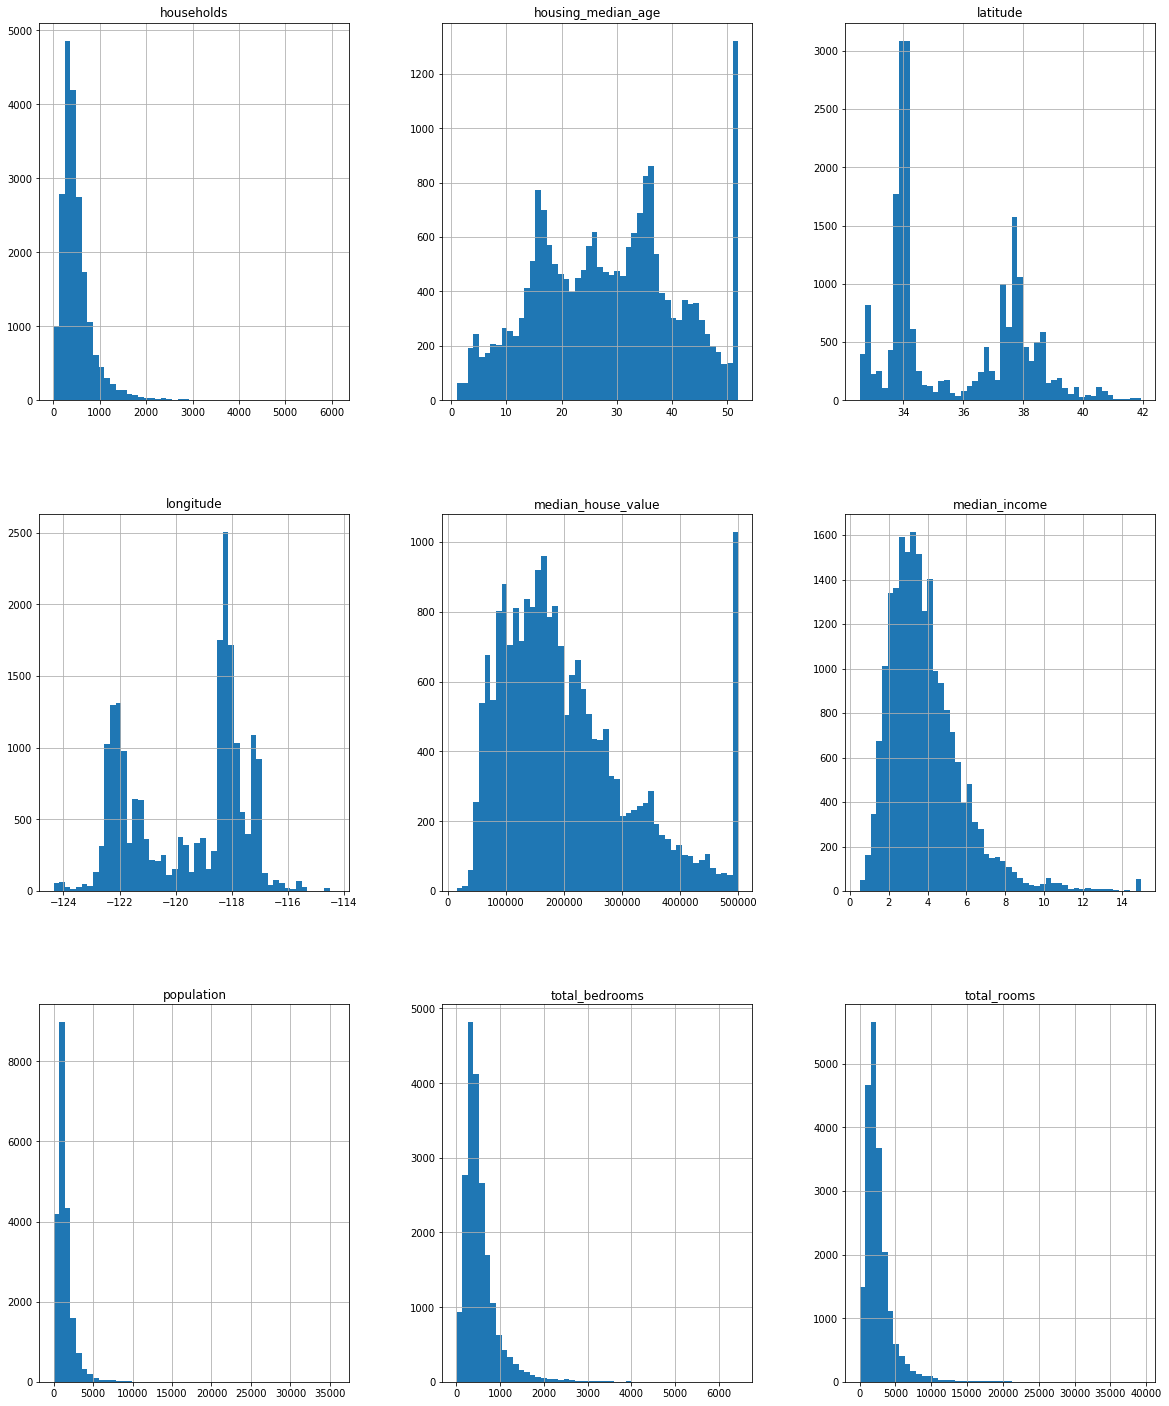

In [3]:
data.hist(bins=50, figsize=(20,25))
plt.show()

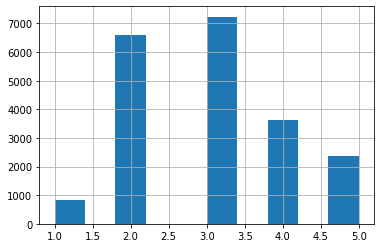

In [4]:
# Check Relation Between Data.
# Problem Type: Regression, Model To Chose will Be [LinearRegression, Tree, RandomForest]
data['income_split'] = np.ceil(data['median_income'] / 1.5)
data['income_split'].where(data['income_split'] < 5, 5.0, inplace=True)
data['income_split'].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
#
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['income_split']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [6]:
%%capture
"""
Here i will prove you that the categories i have devided data into perfectly represents the whole of the dataset ? what does it mean
you may ask well if you want to do some survey you will not go to the whole population and start collecting sample but you will
simply pick some represtentatives of that area and survey them thats whats going on here, I have stratsfied data into cate..
& by comparing Proportions you can clearly see that proportion of the stratisfied & overall dataset is ALMOST SAMEE!!!

"""

In [7]:
print("------STRATIFIED PROPORTION---------------")
print(strat_test_set['income_split'].value_counts() / len(strat_test_set))
print("-----OVERALL PROPORTION---------")
print(data['income_split'].value_counts() / len(data))

------STRATIFIED PROPORTION---------------
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_split, dtype: float64
-----OVERALL PROPORTION---------
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_split, dtype: float64


In [8]:
# Now That we are sure about the proportion whats the point in keeping Category ? lets just kick it out of our dataset for good.
for added in (strat_train_set, strat_test_set):
    added.drop('income_split',axis=1, inplace=True)


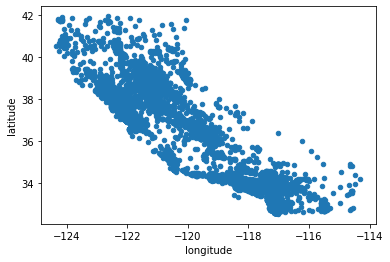

In [9]:
houses = strat_train_set.copy()
houses.plot(kind='scatter', x="longitude", y='latitude')

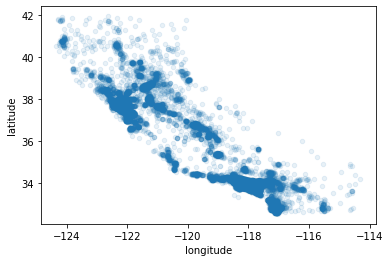

In [10]:
houses.plot(kind='scatter', x="longitude", y='latitude', alpha=0.1)

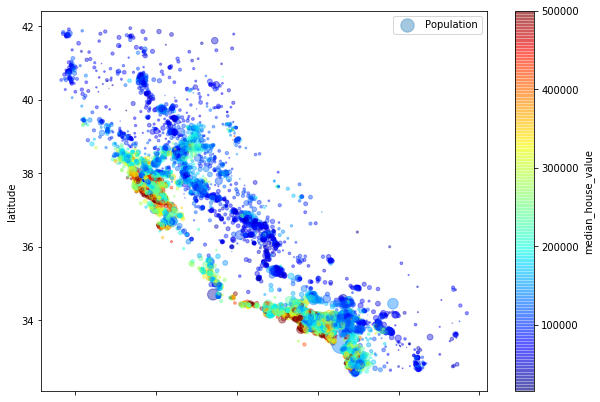

In [11]:
import matplotlib.pyplot as plt
houses.plot(kind='scatter', x="longitude", y='latitude', alpha=0.4,
           s=houses['population'] / 100, label="Population", figsize=(10, 7),
           c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


In [12]:
# Lets look for correlations :) 

cor = houses.corr()
cor['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

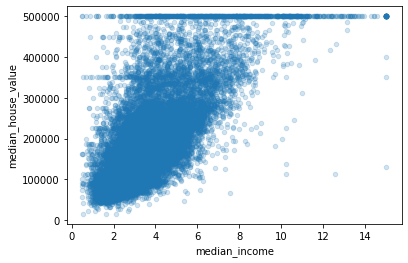

In [13]:
houses.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

In [14]:
houses['people_per_house'] = houses['population'] / houses['households']
houses['rooms_per_house'] = houses['total_rooms'] / houses['households']
houses['bedrm_per_house'] = houses['total_bedrooms'] / houses['total_rooms']

In [15]:
cr = houses.corr()
cr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
rooms_per_house       0.146285
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
people_per_house     -0.021985
population           -0.026920
longitude            -0.047432
latitude             -0.142724
bedrm_per_house      -0.259984
Name: median_house_value, dtype: float64

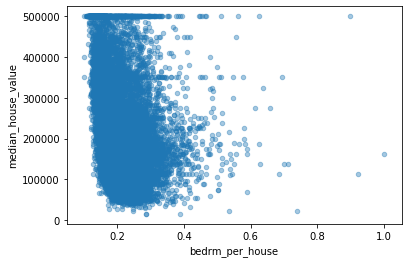

In [16]:
houses.plot(kind='scatter', x='bedrm_per_house', y='median_house_value', alpha=0.4)

In [17]:
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,people_per_house,rooms_per_house,bedrm_per_house
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.094395,4.625369,0.223852
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,2.707965,6.008850,0.159057
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.025974,4.225108,0.241291
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,4.135977,5.232295,0.200866
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.047847,4.505810,0.231341


In [18]:
%%capture
"""
Ops we have a problem here :) ? as you can see the attribute ocean_proximity is String whaaat ? this will be a serious problem,
why you may ask ? well simple how is a machine supposed to perform linearRegression on String ??? we need to transform this at-
-tribute to int or float so that we can pass it to machine and check correlation too.

"""

In [19]:
housing_atrs = strat_train_set.drop('median_house_value', 1)
housing_label = strat_train_set['median_house_value'].copy()

sample_incomplete_rows = houses[houses.isnull().any(axis=1)].head()
median = houses["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [20]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,people_per_house,rooms_per_house,bedrm_per_house
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,175000.0,<1H OCEAN,2.254446,2.571135,NaN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,264400.0,<1H OCEAN,4.178817,6.371389,NaN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,287100.0,<1H OCEAN,2.588083,5.064767,NaN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,95800.0,INLAND,2.657289,5.511509,NaN
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,191000.0,<1H OCEAN,2.468327,4.866192,NaN


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing_atrs.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [22]:
d = imputer.transform(housing_num)
housing_new_attr = pd.DataFrame(d, columns=housing_num.columns, index=housing_atrs.index)

In [23]:
housing_new_attr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [24]:
housing_new_attr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [25]:
housing_tr = pd.DataFrame(d, columns=housing_num.columns,index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [26]:
house_cat = housing_atrs[['ocean_proximity']]
house_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(house_cat)
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_atrs.values)

In [30]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_atrs.columns)+["rooms_per_household", "population_per_household"],
    index=housing_atrs.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_atrs)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)
# let's try the full preprocessing pipeline on a few training instances
some_data = housing_atrs.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [38]:
predictions = lin_reg.predict(housing_prepared)
mse = mean_squared_error(housing_label, predictions)
np.sqrt(mse)

68628.19819848922

In [47]:
tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_label)
tree_pr = tree.predict(housing_prepared)
mse = mean_squared_error(housing_label, tree_pr)
np.sqrt(mse)

0.0

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, housing_prepared, housing_label,scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
print(np.sqrt(-scores).std())

71188.49901054439
2743.4584815964067


In [52]:
scores = cross_val_score(lin_reg, housing_prepared, housing_label,scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
print(np.sqrt(-scores).std())

69052.46136345083
2731.674001798347


In [94]:
# Ensemble Learning Model Time Boys :)) <3
from sklearn.ensemble import RandomForestRegressor

In [95]:
forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_label)
predict = forest.predict(housing_prepared)
scores = cross_val_score(forest, housing_prepared, housing_label, scoring="neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
print(np.sqrt(-scores).std())

50170.95174594384
1986.6858076266142


In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [98]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [99]:
for items, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    print(items, '-' , np.sqrt(-score))

{'max_features': 2, 'n_estimators': 3} - 64147.15017250635
{'max_features': 2, 'n_estimators': 10} - 56247.700460255044
{'max_features': 2, 'n_estimators': 30} - 52920.63874456864
{'max_features': 4, 'n_estimators': 3} - 59706.96390243626
{'max_features': 4, 'n_estimators': 10} - 53263.04202284765
{'max_features': 4, 'n_estimators': 30} - 50761.31089919042
{'max_features': 6, 'n_estimators': 3} - 58627.292185115264
{'max_features': 6, 'n_estimators': 10} - 51838.79797890163
{'max_features': 6, 'n_estimators': 30} - 49932.62177836144
{'max_features': 8, 'n_estimators': 3} - 58295.90457133258
{'max_features': 8, 'n_estimators': 10} - 52131.40366764272
{'max_features': 8, 'n_estimators': 30} - 50146.25679801348
{'bootstrap': False, 'max_features': 2, 'n_estimators': 3} - 61824.79273527735
{'bootstrap': False, 'max_features': 2, 'n_estimators': 10} - 54361.98433125726
{'bootstrap': False, 'max_features': 3, 'n_estimators': 3} - 60133.72200342025
{'bootstrap': False, 'max_features': 3, 'n_e

In [100]:
best_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set['median_house_value']
X_test_fixed = full_pipeline.transform(X_test)
best_model.fit(X_test_fixed, Y_test)
predictions = best_model.predict(X_test_fixed)
error = mean_squared_error(Y_test, predictions)
print("MACHINE PREDICTION ERROR: +-",np.sqrt(error))

MACHINE PREDICTION ERROR: +- 20280.86059488088


In [101]:
# We have final Predictions By Machine which has difference of +- 20372 $ not much when we are dealing with data in millions :)
# Trained & Tested By: Habab () - Book Hands on ML (C: 2)
# Time Taken 7 Days.
# Level (Super Hard)